In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

plt.rcParams['font.family'] = "Malgun Gothic"

data = pd.read_csv("dataset/seoulbike.csv",encoding="cp949")

data["Date"] = pd.to_datetime(data["Date"], format='%d/%m/%Y')

base_date = data["Date"].min()

data['Days'] = (data['Date'] - base_date).dt.days


In [17]:
X = data.drop(["Seasons","Holiday","Functioning Day","Date","Rented Bike Count"], axis=1)
y = data["Rented Bike Count"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

rf_model = LinearRegression()
rf_model.fit(X_train,y_train)

feature_importance = pd.DataFrame({
    "특성": X.columns,
    "중요도": rf_model.coef_
}).sort_values("중요도", ascending=False)

c:\ai_project\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


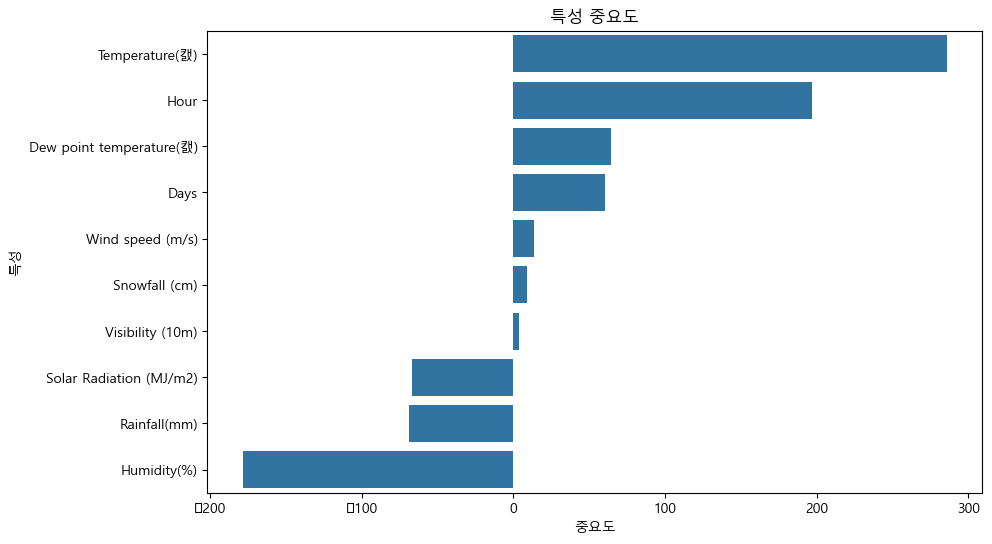

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x="중요도", y="특성", data=feature_importance)
plt.title("특성 중요도")
plt.show()